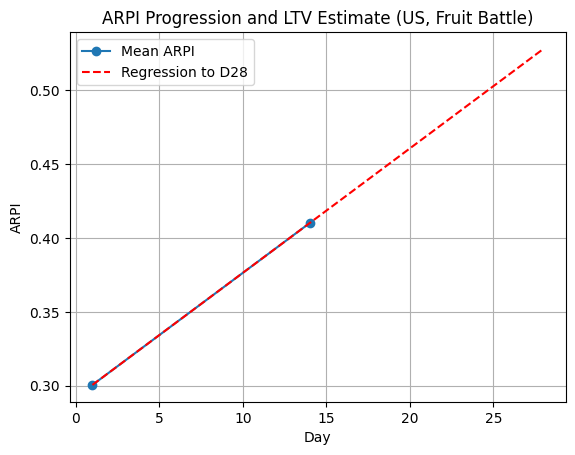

Estimated LTV (ARPI_D28) for US: 0.5280


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load and filter data
df = pd.read_csv('summary.csv', parse_dates=['install_date'])
us = df[(df['client'] == 'fruit_battle') & (df['country'] == 'US') & (df['install_date'].between('2021-12-01', '2021-12-15'))]

# Use linear regression and do an Overall estimate (mean ARPI_D1 and ARPI_D14 across all cohorts)
arpi_means = [us['arpi_d1'].mean(), us['arpi_d14'].mean()]
days = np.array([[1], [14]])
model = LinearRegression().fit(days, arpi_means)
ltv_28 = model.predict([[28]])[0]

# Plot
plt.plot([1, 14], arpi_means, 'o-', label='Mean ARPI')
plt.plot([1, 14, 28], [arpi_means[0], arpi_means[1], ltv_28], 'r--', label='Regression to D28')
plt.xlabel('Day')
plt.ylabel('ARPI')
plt.title('ARPI Progression and LTV Estimate (US, Fruit Battle)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated LTV (ARPI_D28) for US: {ltv_28:.4f}") #rounded to 4 decimal places